In [3]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

import sys
sys.path.append('/home/chris/repos/sentiment_analysis/')

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from credential import * 

def twitter_setup():
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [6]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="RegSprecher", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

RT @AA_SicherReisen: #Ouagadougou. Wir drücken allen Angehörigen der Opfer unser herzliches Beileid aus und wünschen den Verletzten gute Ge…

@clouds_walking Oje. Ich leide mit. Danke für den Hinweis!

Kanzlerin #Merkel telefoniert mit @POTUS Trump. Beide fordern Umsetzung der Resolution des UN-Sicherheitsrates und… https://t.co/L11Fmt5pho

RT @RegSprecher: Aufgrund mehrerer Nachfragen: Tatsächlich ist nun lediglich die Umwidmung bestimmter „Reserveantibiotika“ verboten. Aus Ti…

Aufgrund mehrerer Nachfragen: Tatsächlich ist nun lediglich die Umwidmung bestimmter „Reserveantibiotika“ verboten.… https://t.co/2ic2e87Qfv



In [7]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,RT @AA_SicherReisen: #Ouagadougou. Wir drücken...
1,@clouds_walking Oje. Ich leide mit. Danke für ...
2,Kanzlerin #Merkel telefoniert mit @POTUS Trump...
3,RT @RegSprecher: Aufgrund mehrerer Nachfragen:...
4,Aufgrund mehrerer Nachfragen: Tatsächlich ist ...
5,Strengere Regeln für Antibiotika in der Tierha...
6,RT @RegSprecher: @myvantage Im Oktober 2017 - ...
7,@myvantage Im Oktober 2017 - die letzte verfüg...
8,Die gute Entwicklung am Arbeitsmarkt geht weit...
9,Die Millionen von Ehrenamtlichen sind ein wahr...


In [8]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [35]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)


969623986408697858
2018-03-02 17:22:27
Twitter Web Client
0
9
None
None
{'hashtags': [{'text': 'Ouagadougou', 'indices': [21, 33]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AA_SicherReisen', 'name': 'Krisenreaktionszentrum', 'id': 958330185497174017, 'id_str': '958330185497174017', 'indices': [3, 19]}], 'urls': []}
None


In [47]:
print(tweets[45].entities)

AttributeError: 'ResultSet' object has no attribute 'entities'

In [56]:
hashtag = tweets[0].entities
print(type(hashtag))
hashtag

<class 'dict'>


{'hashtags': [{'indices': [21, 33], 'text': 'Ouagadougou'}],
 'symbols': [],
 'urls': [],
 'user_mentions': [{'id': 958330185497174017,
   'id_str': '958330185497174017',
   'indices': [3, 19],
   'name': 'Krisenreaktionszentrum',
   'screen_name': 'AA_SicherReisen'}]}

In [64]:
hashtag = tweets[0].entities.get('hashtags')[0].get('text')
print(type(hashtag))
hashtag

<class 'str'>


'Ouagadougou'

In [10]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [13]:
display(data.head(20))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @AA_SicherReisen: #Ouagadougou. Wir drücken...,140,969623986408697858,2018-03-02 17:22:27,Twitter Web Client,0,9
1,@clouds_walking Oje. Ich leide mit. Danke für ...,58,969621833346580481,2018-03-02 17:13:54,Twitter for iPad,5,0
2,Kanzlerin #Merkel telefoniert mit @POTUS Trump...,139,969578638894092288,2018-03-02 14:22:16,Twitter Web Client,55,24
3,RT @RegSprecher: Aufgrund mehrerer Nachfragen:...,140,969240831386415104,2018-03-01 15:59:56,Twitter Web Client,0,11
4,Aufgrund mehrerer Nachfragen: Tatsächlich ist ...,140,969240510664724481,2018-03-01 15:58:40,Twitter Web Client,25,11
5,Strengere Regeln für Antibiotika in der Tierha...,140,969221728592367621,2018-03-01 14:44:02,Twitter Web Client,78,19
6,RT @RegSprecher: @myvantage Im Oktober 2017 - ...,140,969198567704408064,2018-03-01 13:12:00,Twitter Web Client,0,5
7,@myvantage Im Oktober 2017 - die letzte verfüg...,140,969198333540659200,2018-03-01 13:11:04,Twitter Web Client,11,5
8,Die gute Entwicklung am Arbeitsmarkt geht weit...,140,968860418407051265,2018-02-28 14:48:18,Twitter Web Client,74,28
9,Die Millionen von Ehrenamtlichen sind ein wahr...,140,968859822807371777,2018-02-28 14:45:56,Twitter Web Client,104,40


In [14]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 135.11


In [15]:
# We extract the tweet with more FAVs and more RTs:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Es lebe die deutsch-französische Freundschaft! 
Vor 55 Jahren wurde der #Élysée-Vertrag unterzeichnet. Heute sagen… https://t.co/ETWuDkZef9
Number of likes: 1404
139 characters.

The tweet with more retweets is: 
Es lebe die deutsch-französische Freundschaft! 
Vor 55 Jahren wurde der #Élysée-Vertrag unterzeichnet. Heute sagen… https://t.co/ETWuDkZef9
Number of retweets: 595
139 characters.



In [18]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

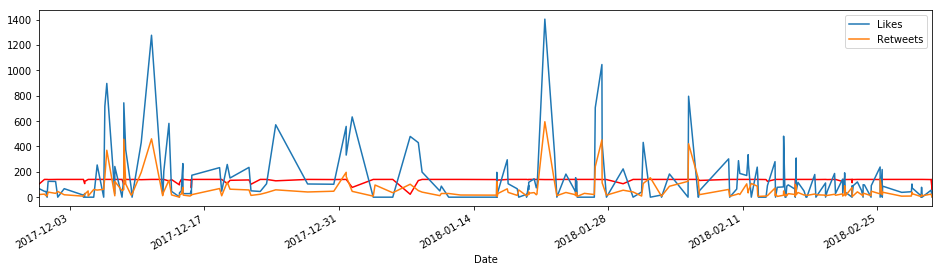

In [19]:
tlen.plot(figsize=(16,4), color='r');
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True)

In [20]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter Web Client
* Twitter for iPad
* Twitter for iPhone
* Media Studio
* TweetDeck


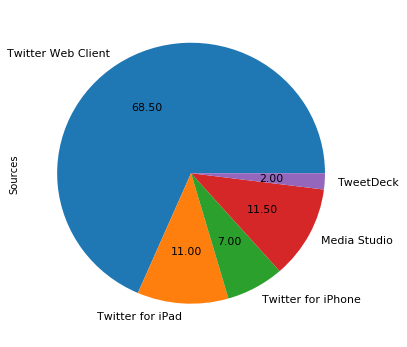

In [21]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [30]:
from textblob import TextBlob

import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [31]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @AA_SicherReisen: #Ouagadougou. Wir drücken...,140,969623986408697858,2018-03-02 17:22:27,Twitter Web Client,0,9,0
1,@clouds_walking Oje. Ich leide mit. Danke für ...,58,969621833346580481,2018-03-02 17:13:54,Twitter for iPad,5,0,0
2,Kanzlerin #Merkel telefoniert mit @POTUS Trump...,139,969578638894092288,2018-03-02 14:22:16,Twitter Web Client,55,24,0
3,RT @RegSprecher: Aufgrund mehrerer Nachfragen:...,140,969240831386415104,2018-03-01 15:59:56,Twitter Web Client,0,11,0
4,Aufgrund mehrerer Nachfragen: Tatsächlich ist ...,140,969240510664724481,2018-03-01 15:58:40,Twitter Web Client,25,11,0
5,Strengere Regeln für Antibiotika in der Tierha...,140,969221728592367621,2018-03-01 14:44:02,Twitter Web Client,78,19,0
6,RT @RegSprecher: @myvantage Im Oktober 2017 - ...,140,969198567704408064,2018-03-01 13:12:00,Twitter Web Client,0,5,0
7,@myvantage Im Oktober 2017 - die letzte verfüg...,140,969198333540659200,2018-03-01 13:11:04,Twitter Web Client,11,5,0
8,Die gute Entwicklung am Arbeitsmarkt geht weit...,140,968860418407051265,2018-02-28 14:48:18,Twitter Web Client,74,28,0
9,Die Millionen von Ehrenamtlichen sind ein wahr...,140,968859822807371777,2018-02-28 14:45:56,Twitter Web Client,104,40,0


In [25]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [32]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 6.0%
Percentage of neutral tweets: 92.5%
Percentage de negative tweets: 1.5%


In [34]:
d = {}
for a, x in bag.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: name 'bag' is not defined